      git clone https://github.com/martinkersner/py_img_seg_eval

In [14]:
import eval_segm as evse
import os
from skimage import io
import matplotlib as plt
import numpy as np
import pandas as pd
import base64
from IPython.display import display, Javascript
from IPython.display import display, HTML
from IPython.utils.py3compat import str_to_bytes, bytes_to_str

PATH_PRUEBAS = "../Resultados"
pred_3d = io.imread(PATH_PRUEBAS+"/15_COMPOUND/prueba_2/Val/58_pred.png")
gt_3d = io.imread(PATH_PRUEBAS+"/15_COMPOUND/prueba_2/Val/58_gt.png")
label_3d = io.imread("../data/dataset/OVERLAECOBO/WITHOUT BACKGROUND/OVERLAECOBO_15/LABEL/val_labels/58.png")

iou_framework = pd.read_csv(PATH_PRUEBAS+"/15_COMPOUND/prueba_2/Val/val_scores.csv")
"mean iou:",iou_framework.loc[54][5]

('mean iou:', 0.283134)

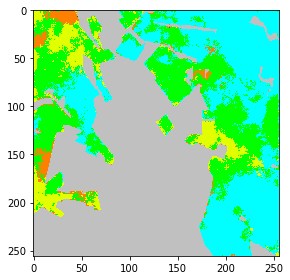

In [15]:
io.imshow(pred_3d)

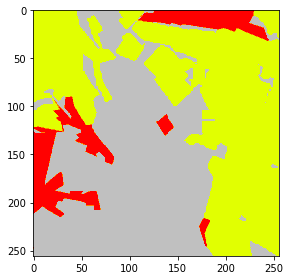

In [16]:
io.imshow(gt_3d)

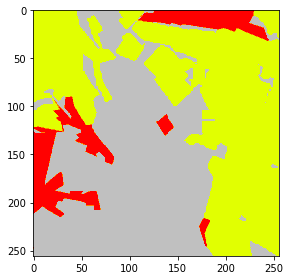

In [17]:
io.imshow(label_3d)

In [18]:
def get_target_matrix(layer_to_extract):
    
    to_extract = layer_to_extract.reshape(256*256,3)
    newmat = np.zeros((256*256,))+45

    for j,i in enumerate(to_extract):

        # Clases 3, 4 o 6
        if i[0] <= 96:

            # Clase 3
            if 150 <= i[2]:
                newmat[j] = 3
            
            # Clase 3 o 4
            if 150 >= i[2]:

                # Clase 4
                if 190 <= i[1]:
                    newmat[j] = 4

                # Clases 6:
                if i[1] <= 190:
                    newmat[j] = 6


        # Clases 1, 2, 5 o 0
        if 96 <= i[0]:
            
            # Clases 0:
            if i[2] > 130:
                newmat[j] = 0
            
            # Clases 1, 2 o 5:
            if i[2] <= 130:
                newmat[j] = 0          

                # Clases 5:
                if 64 < i[1] < 191:
                    newmat[j] = 5

                # Clases 2:
                if 191 <= i[1]:
                    newmat[j] = 2

                # Clase 1:
                if i[1] <= 64:
                    newmat[j] = 1
           
    return newmat.reshape((256,256))

def target_matrix_to_image_color(mask):
        
    to_extract = mask.reshape((256*256,1))
    newmat = []

    for j,i in enumerate(to_extract):
        if i == 0:
            newmat.append([192, 192, 192])
        if i == 1:
            newmat.append([255, 1, 1])
        if i == 2:
            newmat.append([225, 255, 1])
        if i == 3:
            newmat.append([1, 255, 255])
        if i == 4:
            newmat.append([1, 255, 1])
        if i == 5:
            newmat.append([255, 127, 0])
        if i == 6:
            newmat.append([2, 128, 2])
    return np.array(newmat).reshape((256,256,3))

In [21]:
pred_2d = get_target_matrix(pred_3d)
gt_2d = get_target_matrix(gt_3d)
label_2d = get_target_matrix(label_3d)

In [22]:
evse.pixel_accuracy(pred_2d, gt_2d)

0.4997711181640625

In [23]:
evse.mean_accuracy(pred_2d, gt_2d)

0.31553140677685054

In [24]:
evse.mean_IU(pred_2d, gt_2d)

0.28313393081639204

In [25]:
evse.frequency_weighted_IU(pred_2d, gt_2d)

0.4975077323700897